In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import missingno as msno

<AxesSubplot:>

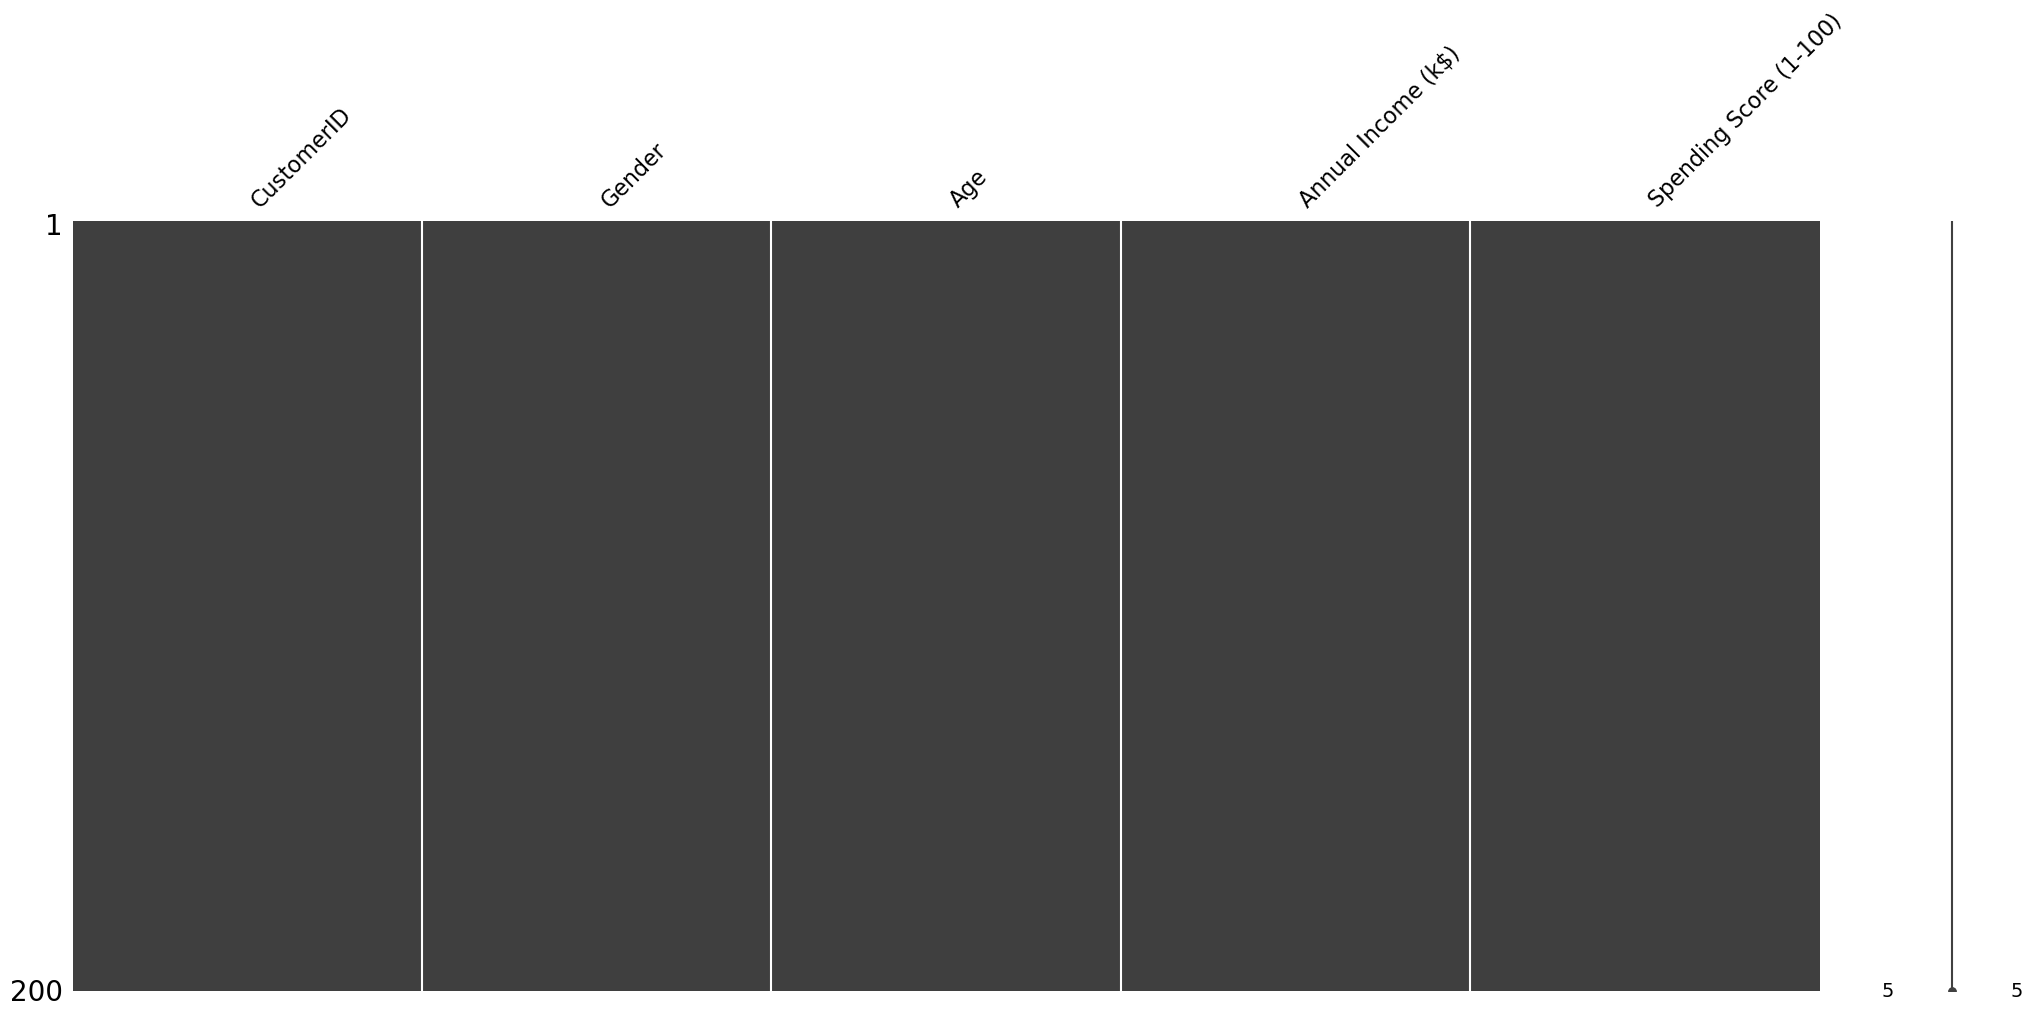

In [8]:
msno.matrix(df)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

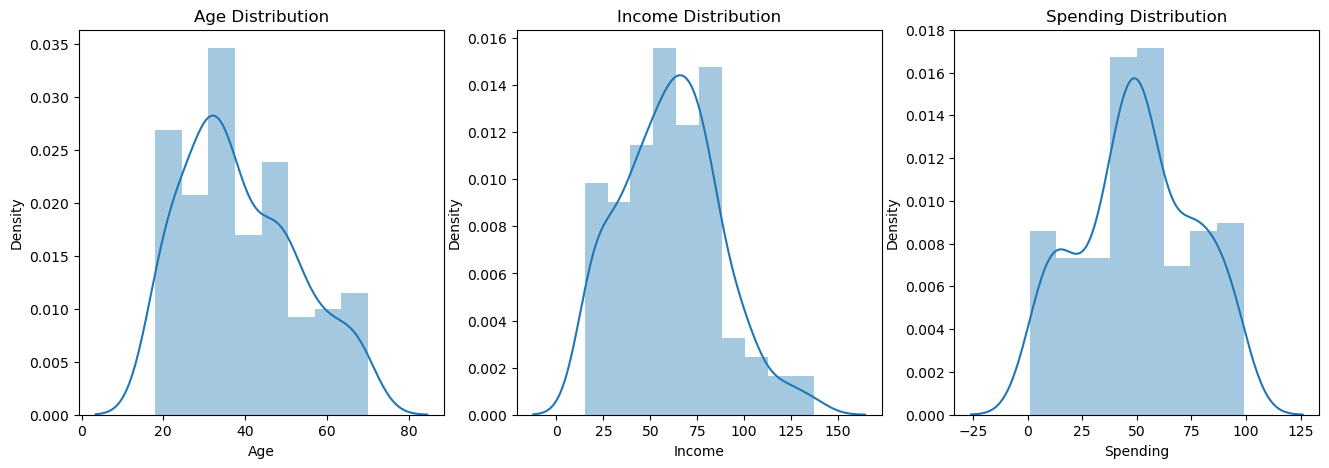

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df.Age)
plt.title('Age Distribution')
plt.xlabel("Age")


plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.title('Income Distribution')
plt.xlabel("Income")


plt.subplot(1,3,3)
sns.distplot(df["Spending Score (1-100)"])
plt.title('Spending Distribution')
plt.xlabel("Spending")


plt.show()

<AxesSubplot:ylabel='Gender'>

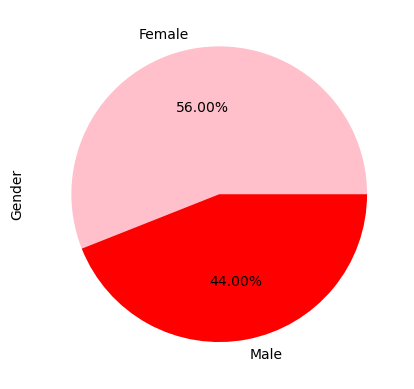

In [11]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%",colors=["pink",'red'])

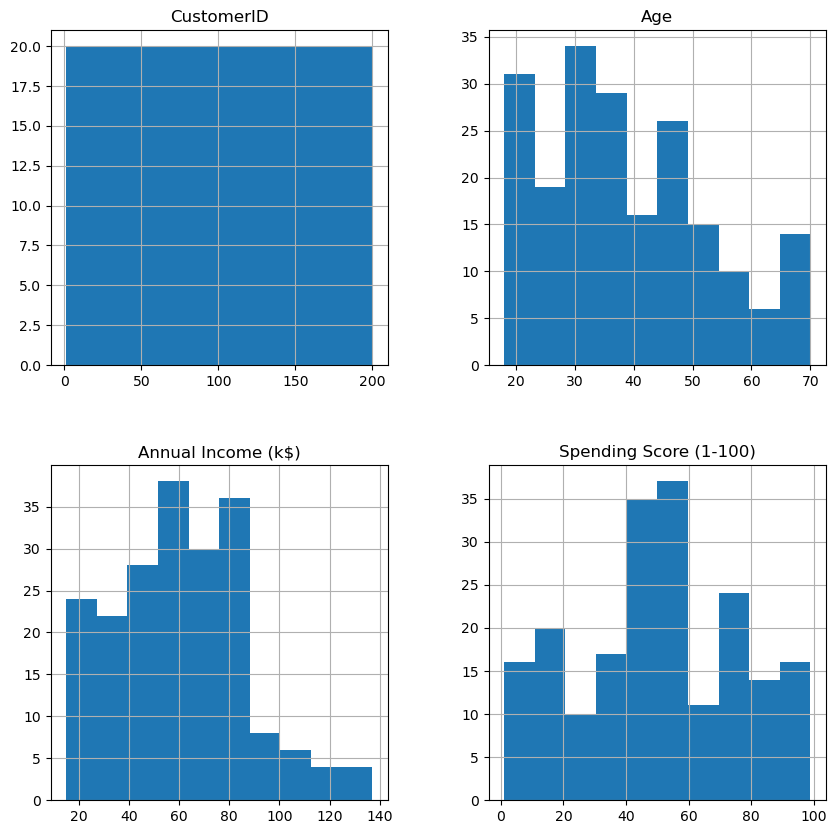

In [12]:
df.hist(figsize=(10,10))
plt.show()

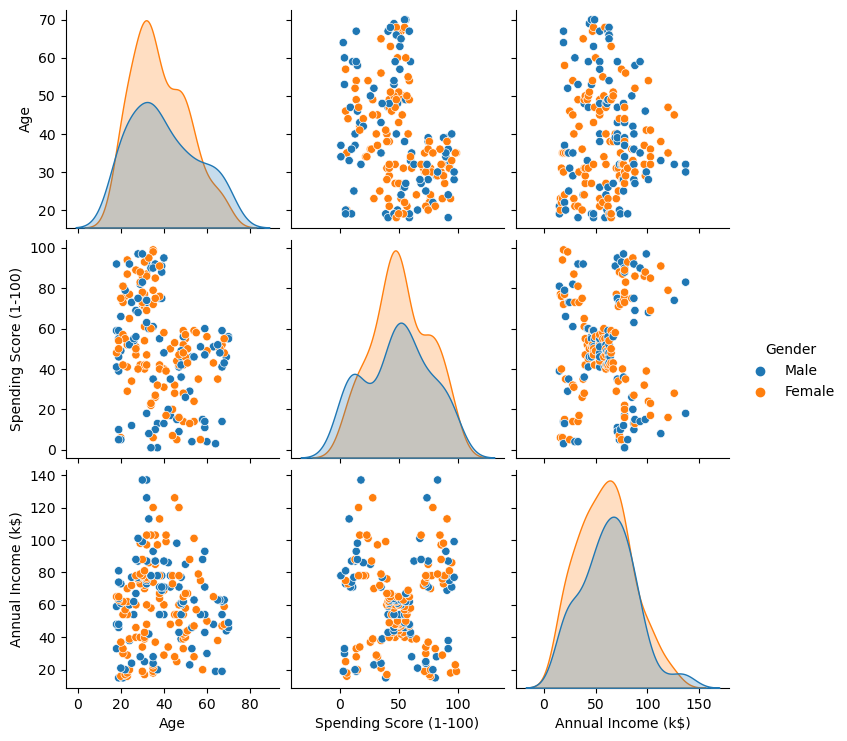

In [13]:
sns.pairplot(df,vars=["Age","Spending Score (1-100)","Annual Income (k$)"],hue="Gender")

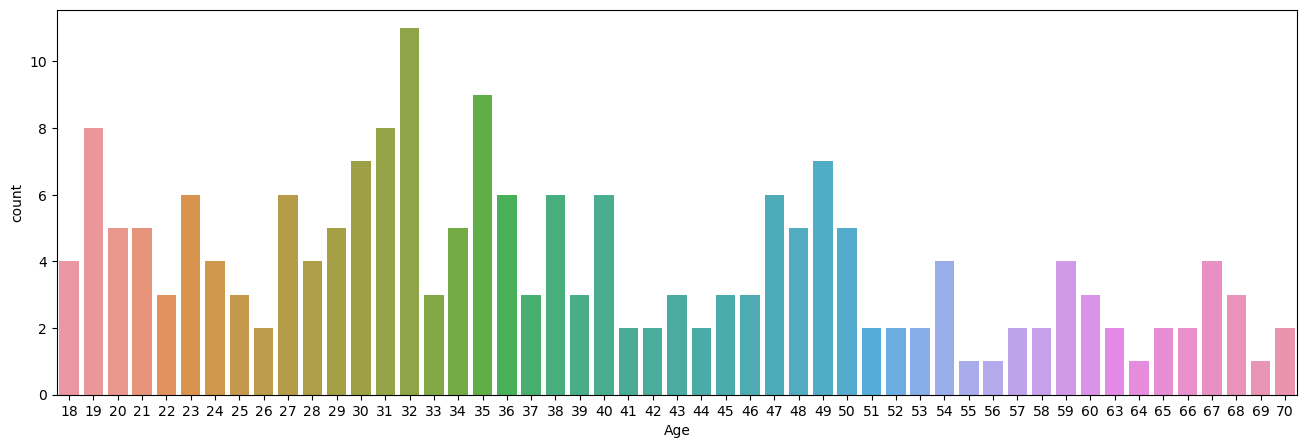

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(df["Age"])
plt.show()

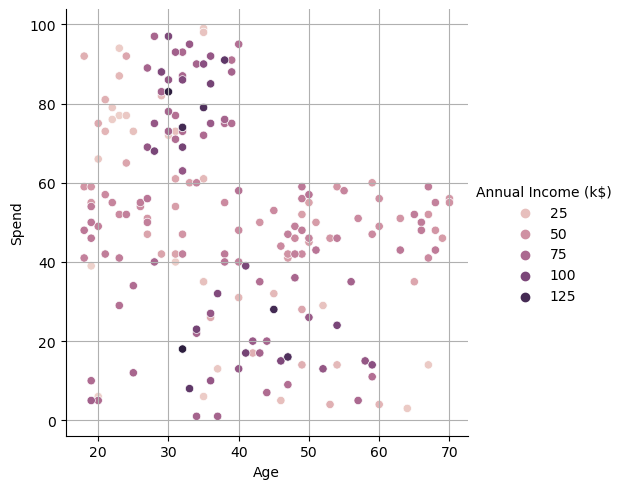

In [15]:
sns.relplot(x='Age',y="Spending Score (1-100)",data=df,hue="Annual Income (k$)",kind="scatter")
plt.xlabel("Age")
plt.ylabel("Spend")
plt.grid()

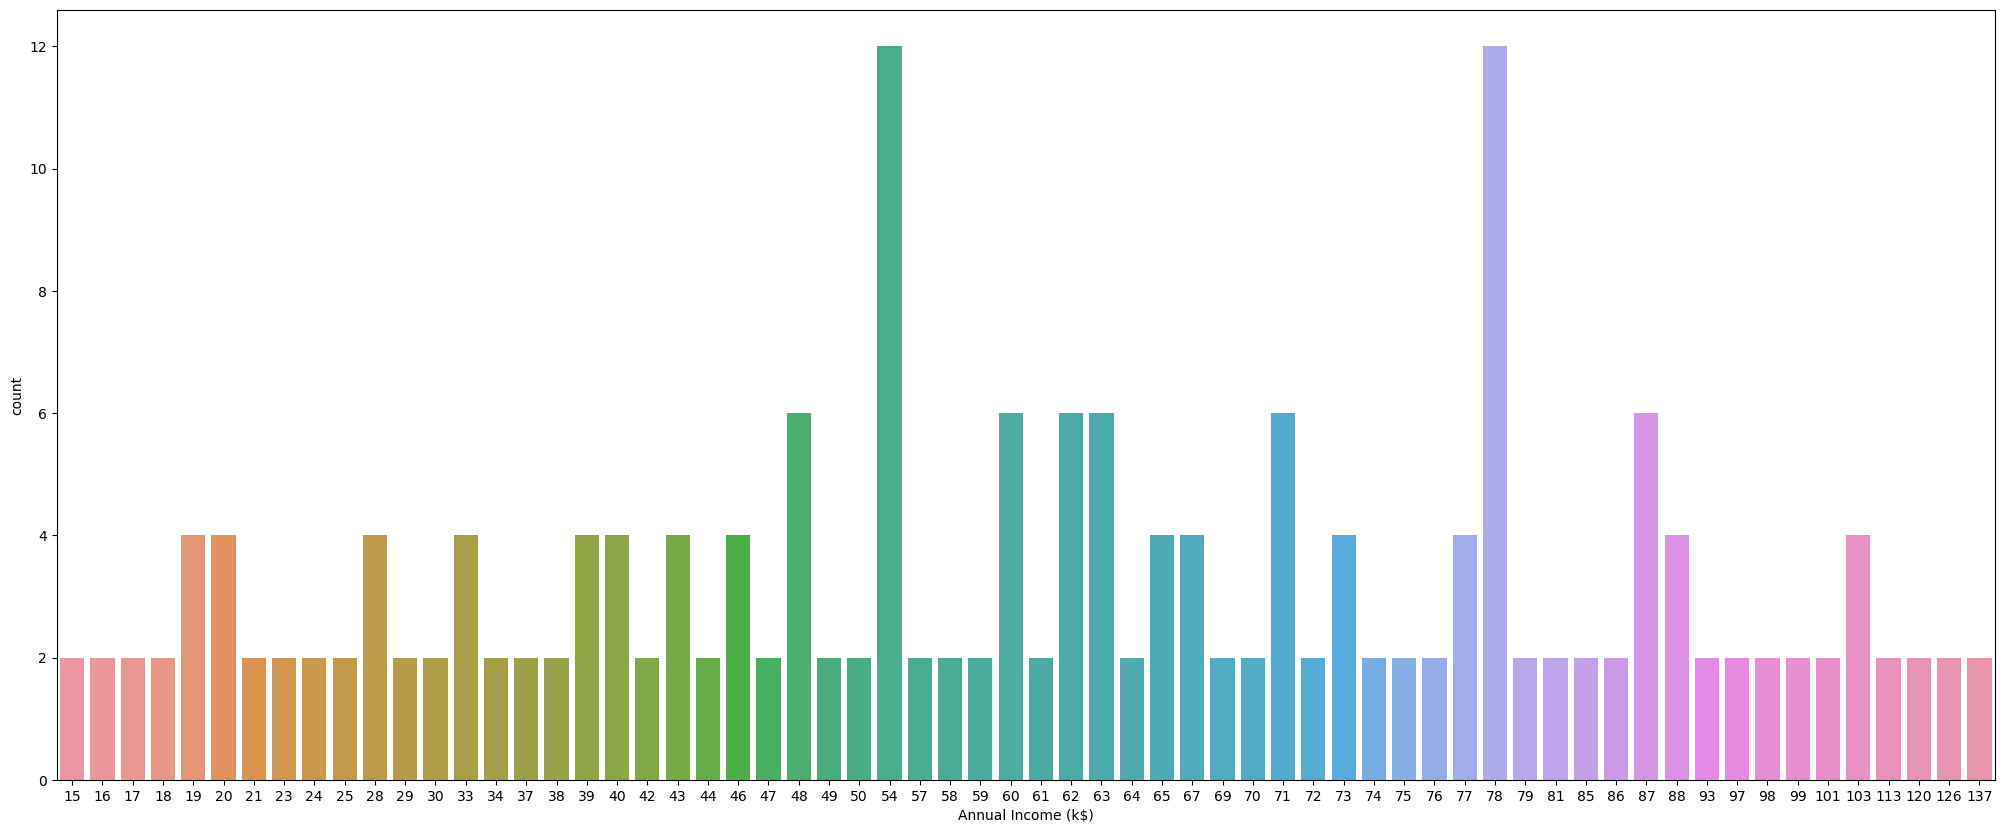

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(df["Annual Income (k$)"])
plt.show()

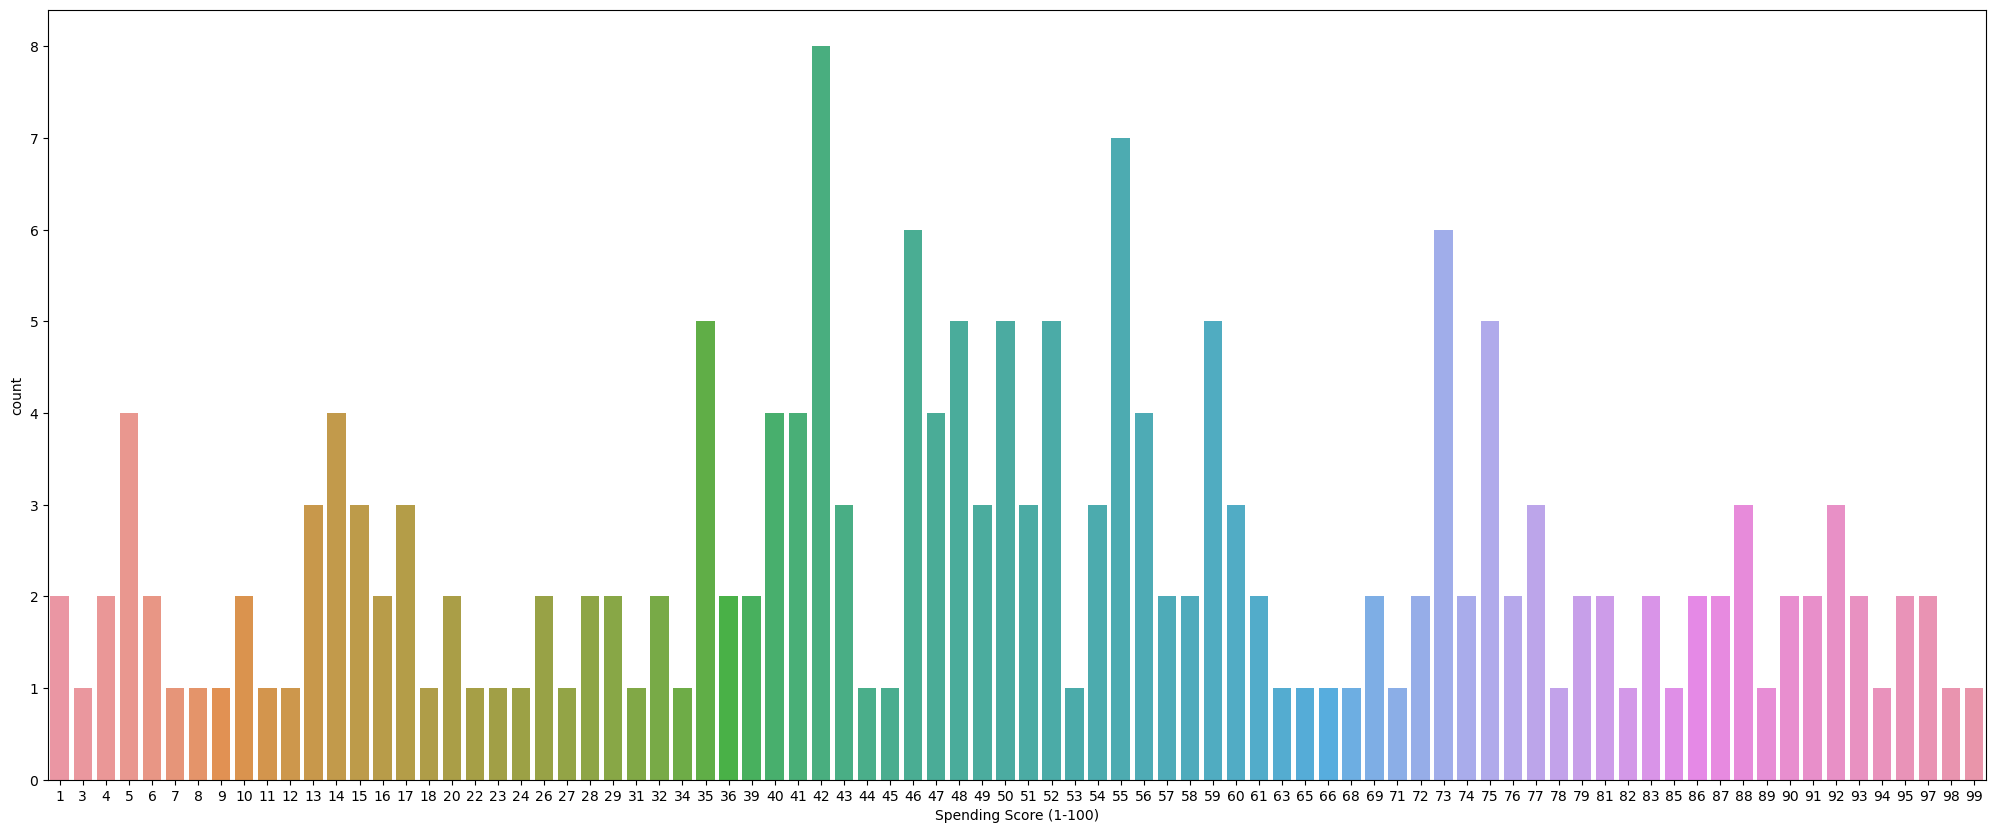

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(df["Spending Score (1-100)"])
plt.show()

<AxesSubplot:>

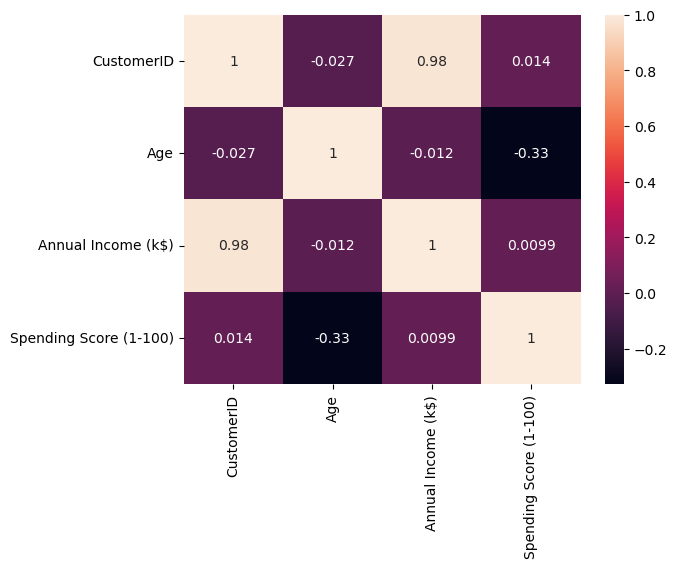

In [20]:
sns.heatmap(df.corr(),annot=True)

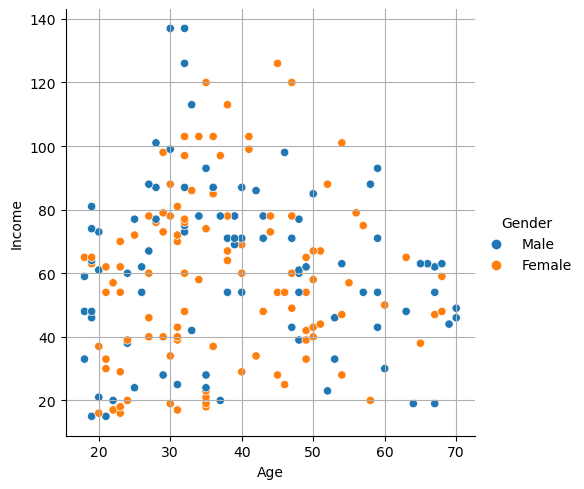

In [21]:
sns.relplot(x='Age',y='Annual Income (k$)',data=df,hue="Gender",kind="scatter")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid()

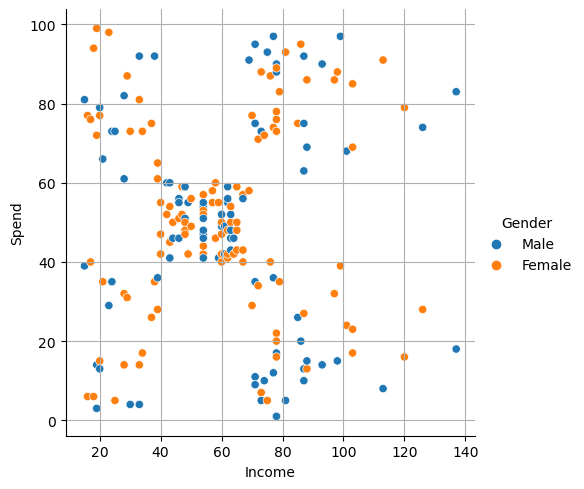

In [24]:
sns.relplot(y="Spending Score (1-100)",x='Annual Income (k$)',data=df,hue="Gender",kind="scatter")
plt.ylabel("Spend")
plt.xlabel("Income")
plt.grid()

In [34]:
x=df.iloc[:,[3,4]].values

In [35]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [25]:
from sklearn.cluster import KMeans

In [36]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

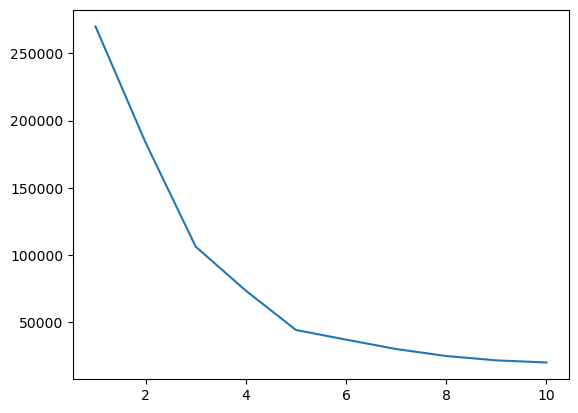

In [37]:
plt.plot(range(1,11),wcss)

In [39]:
km=KMeans(n_clusters=5)
y_means=km.fit_predict(x)

In [40]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [47]:
x[y_means==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

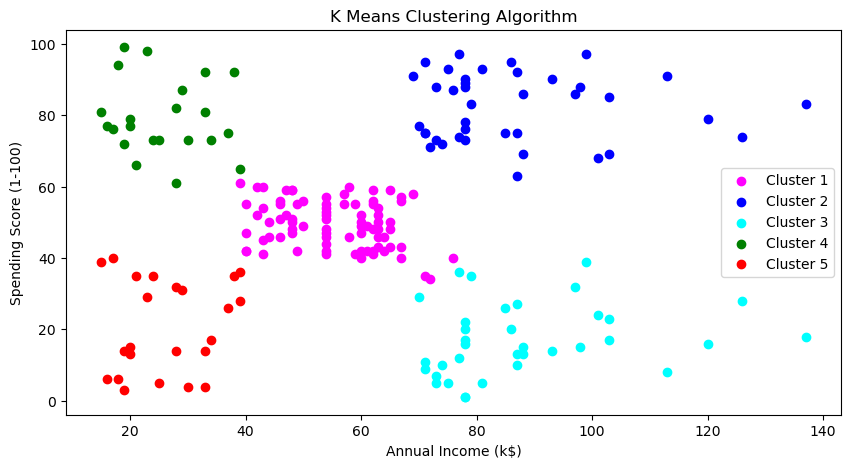

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1],c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1],c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],c = 'cyan', label = 'Cluster 3')  ## Cluster 3
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1],c = 'green', label = 'Cluster 4')  ## Cluster 4
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1],c = 'red', label = 'Cluster 5')   ## Cluster 5
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [51]:
df[y_means==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


In [52]:
df[y_means==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98
